## This notebook is used for adjusting parameters in real-time to detect the reference object (black card on white paper)
<hr style="border:2px solid gray"> </hr>

In [9]:
# Modules/Packages used
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Initialise erosion and dilation kernel
kernel = np.ones((5,5),np.uint8)

# Read image and convert to gray (Use 'CV_Example.png' to practice and learn about simple ComputerVision (CV) concepts)
img = cv2.imread('FrontX.jpeg')
#img = cv2.imread('CV_Example.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
def find_rectangle_contour(contours):
    '''
    Find rectangular contour
    '''

    # Loop through contours
    for ct in contours:

        perimeter = cv2.arcLength(ct, True) # Get contour parameters
        sides = cv2.approxPolyDP(ct, 0.02 * perimeter, True)

        if len(sides) == 4:
            return ct

In [12]:
def draw_contours(contour, image):

    # Make copy of image
    image_copy = image.copy()

    # Convert gray image to colored (doesn't actually return the colors to the picture but allows drawing colors onto it)
    image_copy = cv2.cvtColor(image_copy, cv2.COLOR_GRAY2RGB)

    # Draw contours
    cv2.drawContours(image_copy, contour, -1, (0, 255, 0), 3)

    # Return values
    return image_copy

### Initialise Trackbars to adjust parameters in real-time
<hr style="border:2px solid gray"> </hr>

In [13]:
def nothing(x):
    '''
    Required by 'createTrackbar' method:
    
    Pointer to the function to be called every time the slider changes position. This function should be prototyped as void.
    '''
    pass

def initTrackbar(custom = True):
    '''
    Initialise trackbars
    '''
    
    # Keeping custom as True would set the following initial parameters
    if custom == True:
        gb_init = 15
        cannyTh1_init = 76
        cannyTh2_init = 198
    else:
        gb_init = 1
        cannyTh1_init = 1
        cannyTh2_init = 1
        
    cv2.namedWindow('Trackbars') # Name of window
    
    # Initialise gaussian blur trackbar
    cv2.createTrackbar('GaussianBlur','Trackbars',gb_init,99, nothing)
    cv2.setTrackbarMin('GaussianBlur','Trackbars',1)
    
    # Initialise canny threshold trackbars
    cv2.createTrackbar('CannyTh1','Trackbars',cannyTh1_init,255,nothing)
    cv2.setTrackbarMin('CannyTh1','Trackbars',1)
    
    cv2.createTrackbar('CannyTh2','Trackbars',cannyTh2_init,255,nothing)
    cv2.setTrackbarMin('CannyTh2','Trackbars',1)
    
    # Initialise erosion trackbar
    cv2.createTrackbar('Erode','Trackbars',1,2,nothing)
    
    # Initialse dilation trackbar
    cv2.createTrackbar('Dilate','Trackbars',1,2,nothing)
    
def getTrackbarVal():
    '''
    Function to return current trackbar values
    '''
    
    # Get gaussian blur track position
    gb = cv2.getTrackbarPos('GaussianBlur','Trackbars')
    gb_ksize = (gb,gb)
    
    # Get canny thresholds track position
    cannyTh1 = cv2.getTrackbarPos('CannyTh1','Trackbars')
    cannyTh2 = cv2.getTrackbarPos('CannyTh2','Trackbars')
    
    # Get erosion and dilation track positions
    erode = cv2.getTrackbarPos('Erode','Trackbars')
    dilate = cv2.getTrackbarPos('Dilate','Trackbars')
    
    return gb_ksize, cannyTh1, cannyTh2, erode, dilate

<hr style="border:2px solid gray"> </hr>

### Simple ComputerVision (CV) concepts:

<hr style="border:1px solid gray"> </hr>

#### <u><b>Erosion & Dilation:</u></b>

From MathWorks:

Morphological erosion removes islands and small objects so that only substantive objects remain.

Morphological dilation makes objects more visible and fills in small holes in objects.

https://www.mathworks.com/help/images/morphological-dilation-and-erosion.html

#### <u><b>Guassian Blur:</u></b>

Gaussian blur is a method used to blur an image through the use of a Gaussian function. The point is to reduce noise/detail to make the image simpler to process (easier to detect important objects)

#### <u><b>Canny Edge Detection:</u></b>

From wikipedia:

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images

https://en.wikipedia.org/wiki/Canny_edge_detector

Use custom initialisations: y/ny
Gaussian blur: (15, 15)
Canny threshold 1: 76
Canny threshold 2: 198
Erosion iterations: 3
Dilation iterations: 3


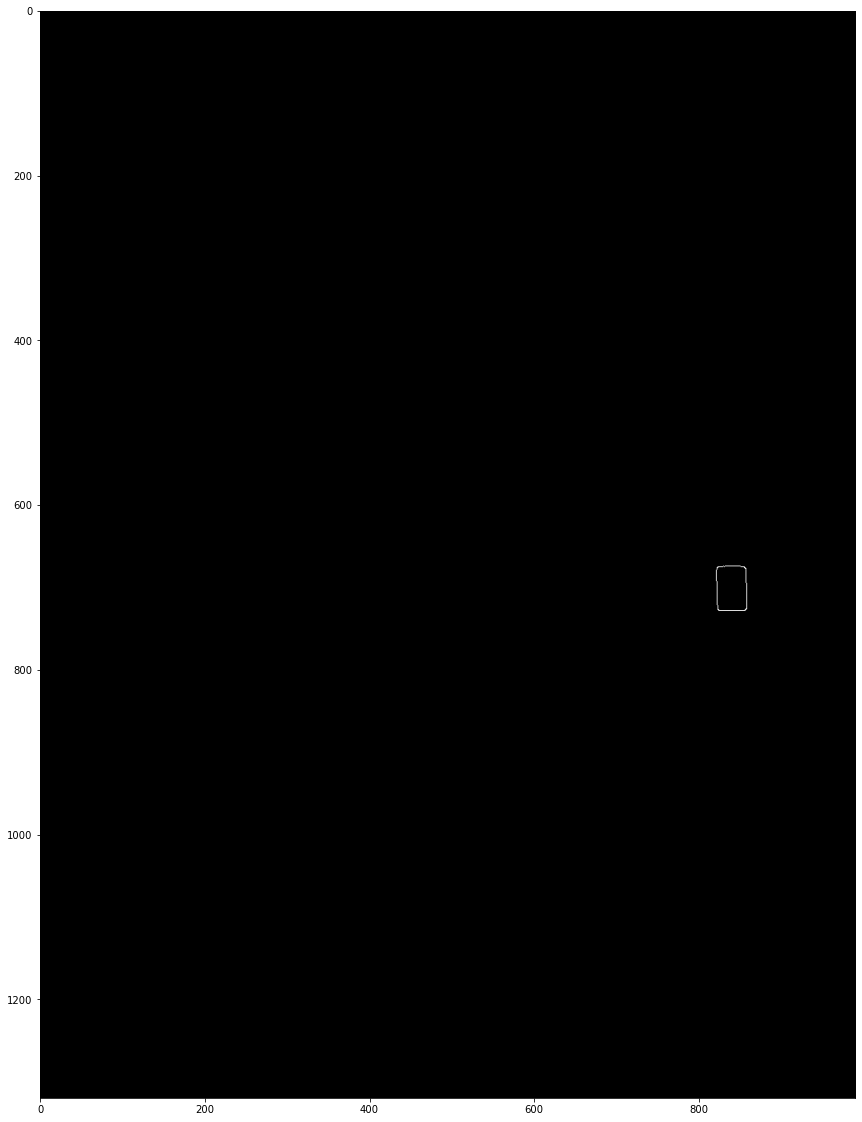

In [14]:
# Initialise trackbars
custom = input('Use custom initialisations: y/n')
if custom == 'y':
    
    initTrackbar(True)

    # Initialise erosion and dilation
    erosion = 3
    dilation = 3
    
else:
    initTrackbar(False)

    # Initialise erosion and dilation
    erosion = 0
    dilation = 0

# Start real-time trial and error
while True:
    
    # Create temp_img as a copy of gray
    temp_img = gray.copy()
    
    # Retrieve current trackbar values
    gb_ksize, cannyTh1, cannyTh2, erode, dilate = getTrackbarVal()
    
    # Make sure gaussian blur values are odd. If even, make them odd by adding one
    if(gb_ksize[0] % 2 != 1):
        ksize = gb_ksize[0] + 1
        gb_ksize = (ksize, ksize)
    
    # Decrement erosion iteration
    if erode == 0:
        erosion -= 1
        if erosion < 1:
            erosion = 0
        temp_img = cv2.erode(temp_img, kernel, iterations = erosion)
    
    # Increment erosion iteration
    elif erode == 2:
        erosion += 1
        temp_img = cv2.erode(temp_img, kernel, iterations = erosion)
    
    # Keep erosion iteration
    else:
        temp_img = cv2.erode(temp_img, kernel, iterations = erosion)

    # Decrement dilation iteration
    if dilate == 0:
        dilation -= 1
        if dilation < 1:
            dilation = 0
        temp_img = cv2.dilate(temp_img, kernel, iterations = dilation)
    
    # Increment dilation iteration
    elif dilate == 2:
        dilation += 1
        temp_img = cv2.dilate(temp_img, kernel, iterations = dilation)
        
    # Keep dilation iteration
    else:
        temp_img = cv2.dilate(temp_img, kernel, iterations = dilation)
    
    # Apply guassian blur and canny edge detection
    temp_img = cv2.GaussianBlur(temp_img, gb_ksize,0,0)
    
    if (cannyTh1 > 1) | (cannyTh2 > 1):
        temp_img = cv2.Canny(temp_img, cannyTh1, cannyTh2)
    
    # Update real-time images (side by side)
    
    # Get contours of previously detected edges
    contours, hierarchy = cv2.findContours(temp_img, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_NONE)
    
    temp_img2 = draw_contours(contours, gray) # Get and draw contours
    ct = find_rectangle_contour(contours) # Find rectangular contour
    temp_img3 = draw_contours(ct, gray) # Draw rectangular contour
    temp_img = cv2.cvtColor(temp_img, cv2.COLOR_GRAY2RGB) # Convert image to RGB temporarily to view side by side
    numpy_horizontal_concat = np.concatenate((temp_img, temp_img2, temp_img3), axis=1) # Concat images
    cv2.imshow('image',numpy_horizontal_concat) # Show images
    
    # Initialise exit key
    key = cv2.waitKey(0)
    
    # Quit real-time image processing if 'q' button is pressed
    if key == ord('q'):
        break

# Destroy all windows
cv2.destroyAllWindows()
cv2.waitKey(1)

# Print final parameters
print('Gaussian blur:', gb_ksize)
print('Canny threshold 1:', cannyTh1)
print('Canny threshold 2:', cannyTh2)
print('Erosion iterations:', erosion)
print('Dilation iterations:', dilation)

# Show final edges
fig=plt.figure(figsize=(20,20))
plt.imshow(temp_img)

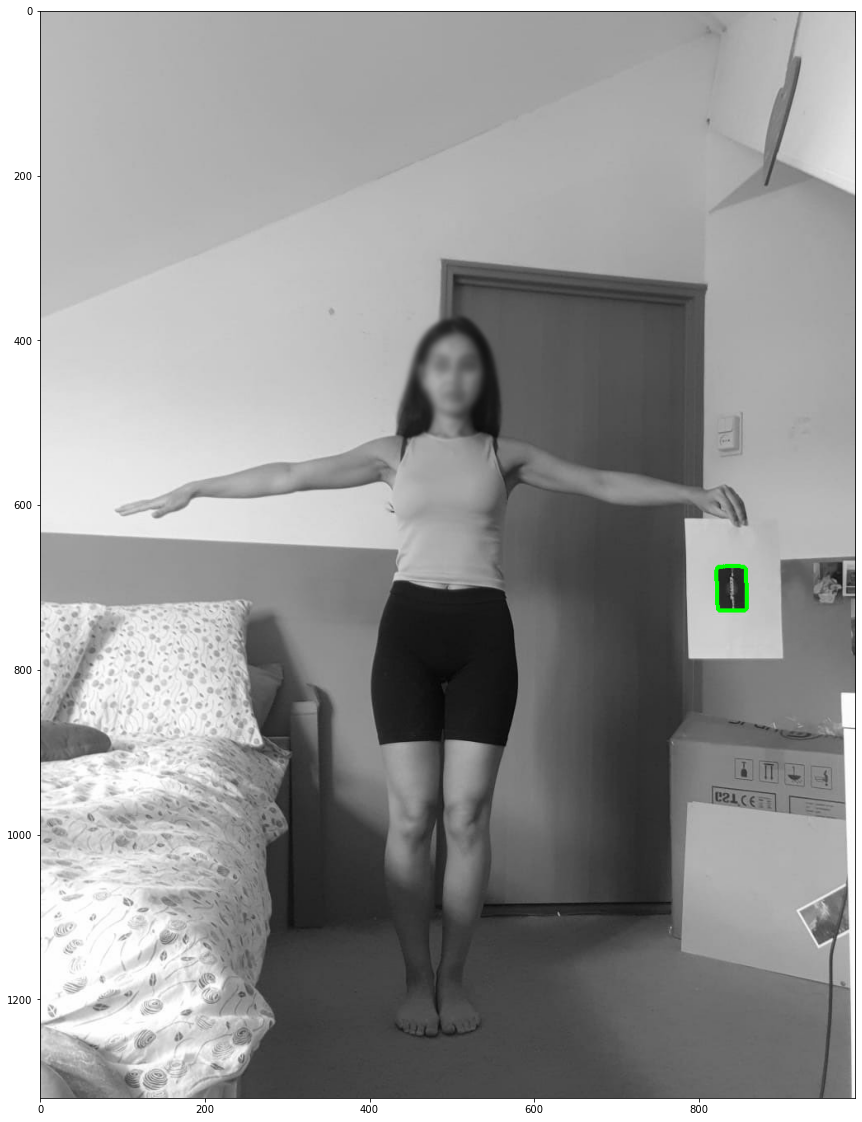

In [15]:
# Show the image
fig=plt.figure(figsize=(20,20))
plt.imshow(temp_img2)

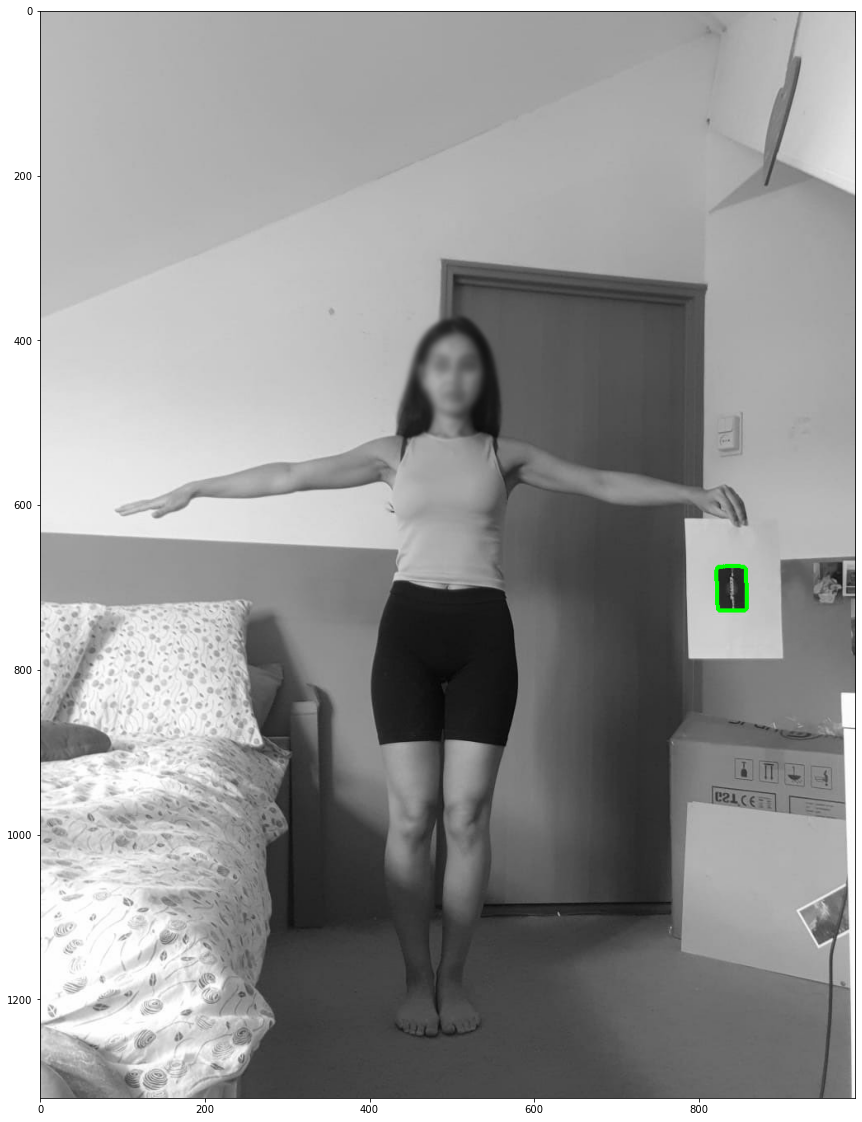

In [16]:
# Show the image
fig=plt.figure(figsize=(20,20))
plt.imshow(temp_img3)